## 1. Data Processing


### Install Library

In [ ]:
!pip install pyspark
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Loading Library

In [ ]:
from time import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from pyspark.sql import SparkSession
from pyspark.sql.functions import stddev,countDistinct,count,avg,col
from pyspark.sql.functions import when
from pyspark.sql.functions import mean

from pyspark.sql.types import IntegerType
from sklearn.impute import SimpleImputer

### Spark Session

In [ ]:
spark = SparkSession.builder.master("local[4]").getOrCreate()

### Saving Data as PySpark DataFrame

In [ ]:
data_as_spark = spark.read.csv('pacients_null.csv',header=True)
data_as_spark_1 = spark.read.csv('pacients_.csv',header=True)

### Data Columns

In [ ]:
data_as_spark.columns

['group',
 'ID',
 'dod',
 'outcome',
 'age',
 'gender',
 'BMI',
 'dofa',
 'hypertensive',
 'atrialfibrillation',
 'CHD_with_no_MI',
 'diabetes',
 'deficiencyanemias',
 'depression',
 'Hyperlipemia',
 'Renull_failure',
 'COPD',
 'heart_rate',
 'Systolic_blood_pressure',
 'Diastolic_blood_pressure',
 'Respiratory_rate',
 'temperature',
 'SPO2',
 'Urine_output',
 'hematocrit',
 'RBC',
 'MCH',
 'MCHC',
 'MCV',
 'RDW',
 'Leucocyte',
 'Platelets',
 'Neutrophils',
 'Basophils',
 'Lymphocyte',
 'PT',
 'INR',
 'NT-proBNP',
 'Creatine_kise',
 'Creatinine',
 'Urea_nitrogen',
 'glucose',
 'Blood_potassium',
 'Blood_sodium',
 'Blood_calcium',
 'Chloride',
 'Anion_gap',
 'Magnesium_ion',
 'PH',
 'Bicarbote',
 'Lactic_acid',
 'PCO2',
 'EF']

### Data Scheme

In [ ]:
data_as_spark.printSchema()

root
 |-- group: string (nullable = true)
 |-- ID: string (nullable = true)
 |-- dod: string (nullable = true)
 |-- outcome: string (nullable = true)
 |-- age: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- BMI: string (nullable = true)
 |-- dofa: string (nullable = true)
 |-- hypertensive: string (nullable = true)
 |-- atrialfibrillation: string (nullable = true)
 |-- CHD_with_no_MI: string (nullable = true)
 |-- diabetes: string (nullable = true)
 |-- deficiencyanemias: string (nullable = true)
 |-- depression: string (nullable = true)
 |-- Hyperlipemia: string (nullable = true)
 |-- Renull_failure: string (nullable = true)
 |-- COPD: string (nullable = true)
 |-- heart_rate: string (nullable = true)
 |-- Systolic_blood_pressure: string (nullable = true)
 |-- Diastolic_blood_pressure: string (nullable = true)
 |-- Respiratory_rate: string (nullable = true)
 |-- temperature: string (nullable = true)
 |-- SPO2: string (nullable = true)
 |-- Urine_output: string (nu

### Data Visualization

In [ ]:
data_as_spark.createOrReplaceTempView("results")
sql_results_data_as_spark = spark.sql("select age Varsta,gender Sex,heart_rate Ritm_cardiac,depression Depresie,temperature Temperatura,Respiratory_rate Frecventa_respiratorie,Blood_calcium Calciu,Blood_potassium Potasiu,Blood_sodium Sodiu  from results")
sql_results_data_as_spark.show()

+------+---+------------+--------+-----------+----------------------+-----------+-----------+-----------+
|Varsta|Sex|Ritm_cardiac|Depresie|Temperatura|Frecventa_respiratorie|     Calciu|    Potasiu|      Sodiu|
+------+---+------------+--------+-----------+----------------------+-----------+-----------+-----------+
|    72|  1| 68.83783784|       0|36.71428571|           16.62162162|7.463636364|4.816666667|     138.75|
|    75|  2| 101.3703704|       0|36.68253968|           20.85185185|     8.1625|       4.45|138.8888889|
|    83|  2| 72.31818182|       0| 36.4537037|                 23.64|8.266666667|      5.825|140.7142857|
|    43|  2|        94.5|       0|36.28703704|           21.85714286|9.476923077|4.386666667|      138.5|
|    75|  2|       67.92|       0|36.76190476|                 21.36|8.733333333|4.783333333|136.6666667|
|    76|  1| 74.18181818|       0|35.26666667|           20.54545455|8.466666667|      4.075|     136.25|
|    72|  1| 69.63636364|       0| 35.6031746|

### Data Summary

In [ ]:
sql_describe_data_as_spark = spark.sql("select age Varsta,gender Sex,heart_rate Ritm_cardiac,temperature Temperatura,Blood_calcium Calciu,Blood_potassium Potasiu from results")
sql_describe_data_as_spark.summary().show()

+-------+-----------------+------------------+------------------+-----------------+------------------+-------------------+
|summary|           Varsta|               Sex|      Ritm_cardiac|      Temperatura|            Calciu|            Potasiu|
+-------+-----------------+------------------+------------------+-----------------+------------------+-------------------+
|  count|             8239|              8239|              8239|             8239|              8239|               8239|
|   mean|74.05522514868309|1.5250637213254035|  84.5758484075085|36.67728595220201| 8.500894160843519|   4.17664639585726|
| stddev|13.42916763628398|0.4994017228542491|16.012801787404708| 0.60733345471502|0.5720539818336826|0.41468493461762823|
|    min|               19|                 1|       100.0357143|            33.25|       10.00769231|                  3|
|    25%|             65.0|               1.0|             72.36|      36.28571429|       8.145454545|                3.9|
|    50%|       

### Visualization of age range

In [ ]:
data_as_spark.createOrReplaceTempView("pacients")
sql_age_range_data_as_spark = spark.sql("select min(age) Varsta_minima , max(age) Varsta_maxima from pacients")
sql_age_range_data_as_spark.show()

+-------------+-------------+
|Varsta_minima|Varsta_maxima|
+-------------+-------------+
|           19|           99|
+-------------+-------------+



### Age distribution

In [ ]:
data_as_spark.createOrReplaceTempView("age_distrib")
sql_age_data_as_spark = spark.sql("SELECT `19-40`,`41-60`,`61-80`,`81-99` FROM ( select count(ID) `19-40` from age_distrib where age>=19 AND age<=40) JOIN (select count(ID) `41-60` from age_distrib where age>=41 AND age<=60) JOIN (select count(ID) `61-80` from age_distrib where age>=61 AND age<=80) JOIN (select count(ID) `81-99` from age_distrib where age>=81 AND age<=99)")
sql_age_data_as_spark.show()

+-----+-----+-----+-----+
|19-40|41-60|61-80|81-99|
+-----+-----+-----+-----+
|  140| 1197| 3619| 3283|
+-----+-----+-----+-----+



### Gender distribution

In [ ]:
data_as_spark.createOrReplaceTempView("age_distrib")
sql_gender_data_as_spark = spark.sql("SELECT `No. Women`,`No. Men` FROM ( select count(ID) `No. Women` from age_distrib where gender==1) JOIN (select count(ID) `No. Men` from age_distrib where gender==2)")
sql_gender_data_as_spark.show()

+---------+-------+
|No. Women|No. Men|
+---------+-------+
|     3913|   4326|
+---------+-------+



### Survivors distribution

In [ ]:
sql_survivors_data_as_spark = spark.sql("SELECT `Survivors`,`Others` FROM ( select count(ID) `Survivors` from age_distrib where outcome==0) JOIN (select count(ID) `Others` from age_distrib where outcome==1)")
sql_survivors_data_as_spark.show()

+---------+------+
|Survivors|Others|
+---------+------+
|     7119|  1113|
+---------+------+



## Data Processing

### Columns processing

A first step that we consider important is renaming the columns of the data set. Some of these contain certain names that are not exactly known. To note which of the columns are important, I will rename each column with a more suggestive name. To view the initial names of the columns, you can observe the result of one of the previous cells.

In [ ]:
data_as_spark=data_as_spark.withColumnRenamed('group','Grup')
data_as_spark=data_as_spark.withColumnRenamed('ID','Numar')
data_as_spark=data_as_spark.withColumnRenamed('dod','Data_deces/externare')
data_as_spark=data_as_spark.withColumnRenamed('outcome','Stare')
data_as_spark=data_as_spark.withColumnRenamed('age','Varsta')
data_as_spark=data_as_spark.withColumnRenamed('gender','Sex')
data_as_spark=data_as_spark.withColumnRenamed('BMI','Indice_de_masa_corporala')
data_as_spark=data_as_spark.withColumnRenamed('dofa','Data_internarii')
data_as_spark=data_as_spark.withColumnRenamed('hypertensive','Hipertensiv')
data_as_spark=data_as_spark.withColumnRenamed('atrialfibrillation','Fibrilatie_atriala')
data_as_spark=data_as_spark.withColumnRenamed('CHD_with_no_MI','Boala_coronariana')
data_as_spark=data_as_spark.withColumnRenamed('diabetes','Diabet')
data_as_spark=data_as_spark.withColumnRenamed('deficiencyanemias','Anemii_deficitare')
data_as_spark=data_as_spark.withColumnRenamed('depression','Depresie')
data_as_spark=data_as_spark.withColumnRenamed('Hyperlipemia','Hiperlipemie')
data_as_spark=data_as_spark.withColumnRenamed('Renull_failure','Insuficienta_renala')
data_as_spark=data_as_spark.withColumnRenamed('COPD','Boala_pulmonara_obstructiva_cronica')
data_as_spark=data_as_spark.withColumnRenamed('heart_rate','Frecventa_cardiaca')
data_as_spark=data_as_spark.withColumnRenamed('Systolic_blood_pressure','Tensiune_arteriala_sistolica')
data_as_spark=data_as_spark.withColumnRenamed('Diastolic_blood_pressure','Tensiune_arteriala_diastolica')
data_as_spark=data_as_spark.withColumnRenamed('Respiratory_rate','Frecventa_respiratorie')
data_as_spark=data_as_spark.withColumnRenamed('temperature','Temperatura')
data_as_spark=data_as_spark.withColumnRenamed('SPO2','Saturatia_pulsului_de_oxigen')
data_as_spark=data_as_spark.withColumnRenamed('Urine_output','Urina')
data_as_spark=data_as_spark.withColumnRenamed('hematocrit','Volumul_celule_rosii_din_sange')
data_as_spark=data_as_spark.withColumnRenamed('RBC','Globule_rosii')
data_as_spark=data_as_spark.withColumnRenamed('MCH','Hemoglobina_corpusculara_medie')
data_as_spark=data_as_spark.withColumnRenamed('MCHC','Concentratia_medie_a_hemoglobinei_corpusculare')
data_as_spark=data_as_spark.withColumnRenamed('MCV','Volumul_corpuscular_mediu')
data_as_spark=data_as_spark.withColumnRenamed('RDW','Latimea_distributiei_globulelor_rosii')
data_as_spark=data_as_spark.withColumnRenamed('Leucocyte','Leucocite')
data_as_spark=data_as_spark.withColumnRenamed('Platelets','Trombocite')
data_as_spark=data_as_spark.withColumnRenamed('Neutrophils','Neurofile')
data_as_spark=data_as_spark.withColumnRenamed('Basophils','Globule_albe')
data_as_spark=data_as_spark.withColumnRenamed('Lymphocyte','Limfocite')
data_as_spark=data_as_spark.withColumnRenamed('PT','Timp_de_protrombina')
data_as_spark=data_as_spark.withColumnRenamed('INR','Raport_internationalizat_normalizat')
data_as_spark=data_as_spark.withColumnRenamed('NT-proBNP','NT_proBNP')
data_as_spark=data_as_spark.withColumnRenamed('Creatine_kise','Creatin_kinaza')
data_as_spark=data_as_spark.withColumnRenamed('Creatinine','Creatina')
data_as_spark=data_as_spark.withColumnRenamed('Urea_nitrogen','Nitrogen_ureic')
data_as_spark=data_as_spark.withColumnRenamed('glucose','Glucoza')
data_as_spark=data_as_spark.withColumnRenamed('Blood_potassium','Potasiu_din_sange')
data_as_spark=data_as_spark.withColumnRenamed('Blood_sodium','Sodiu_din_sange')
data_as_spark=data_as_spark.withColumnRenamed('Blood_calcium','Calciu_din_sange')
data_as_spark=data_as_spark.withColumnRenamed('Chloride','Clorura')
data_as_spark=data_as_spark.withColumnRenamed('Anion_gap','Interval_anionic')
data_as_spark=data_as_spark.withColumnRenamed('Magnesium_ion','Ioni_de_magneziu')
data_as_spark=data_as_spark.withColumnRenamed('PH','Concentratia_ionilor_de_oxigen')
data_as_spark=data_as_spark.withColumnRenamed('Bicarbonate','Bicarbonat')
data_as_spark=data_as_spark.withColumnRenamed('Lactic_acid','Acid_lactic')
data_as_spark=data_as_spark.withColumnRenamed('PCO2','Presiunea_partiala_a_dioxidului_de_carbon')
data_as_spark=data_as_spark.withColumnRenamed('EF','Fractie_de_eliminare')  

In [ ]:
data_as_spark.columns

['Grup',
 'Numar',
 'Data_deces/externare',
 'Stare',
 'Varsta',
 'Sex',
 'Indice_de_masa_corporala',
 'Data_internarii',
 'Hipertensiv',
 'Fibrilatie_atriala',
 'Boala_coronariana',
 'Diabet',
 'Anemii_deficitare',
 'Depresie',
 'Hiperlipemie',
 'Insuficienta_renala',
 'Boala_pulmonara_obstructiva_cronica',
 'Frecventa_cardiaca',
 'Tensiune_arteriala_sistolica',
 'Tensiune_arteriala_diastolica',
 'Frecventa_respiratorie',
 'Temperatura',
 'Saturatia_pulsului_de_oxigen',
 'Urina',
 'Volumul_celule_rosii_din_sange',
 'Globule_rosii',
 'Hemoglobina_corpusculara_medie',
 'Concentratia_medie_a_hemoglobinei_corpusculare',
 'Volumul_corpuscular_mediu',
 'Latimea_distributiei_globulelor_rosii',
 'Leucocite',
 'Trombocite',
 'Neurofile',
 'Globule_albe',
 'Limfocite',
 'Timp_de_protrombina',
 'Raport_internationalizat_normalizat',
 'NT_proBNP',
 'Creatin_kinaza',
 'Creatina',
 'Nitrogen_ureic',
 'Glucoza',
 'Potasiu_din_sange',
 'Sodiu_din_sange',
 'Calciu_din_sange',
 'Clorura',
 'Interval_an

### Processing of the column 'Sex' values

In [ ]:
data_as_spark = data_as_spark.withColumn("Sex",when(data_as_spark.Sex == "1","Female").when(data_as_spark.Sex == "2","Male").otherwise("null"))

### Modifications

In [ ]:
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Varsta,Sex,Frecventa_cardiaca,Depresie,Temperatura,Frecventa_respiratorie from dataset")
sql_results_data_as_spark.show()

+------+------+------------------+--------+-----------+----------------------+
|Varsta|   Sex|Frecventa_cardiaca|Depresie|Temperatura|Frecventa_respiratorie|
+------+------+------------------+--------+-----------+----------------------+
|    72|Female|       68.83783784|       0|36.71428571|           16.62162162|
|    75|  Male|       101.3703704|       0|36.68253968|           20.85185185|
|    83|  Male|       72.31818182|       0| 36.4537037|                 23.64|
|    43|  Male|              94.5|       0|36.28703704|           21.85714286|
|    75|  Male|             67.92|       0|36.76190476|                 21.36|
|    76|Female|       74.18181818|       0|35.26666667|           20.54545455|
|    72|Female|       69.63636364|       0| 35.6031746|           19.14814815|
|    83|  Male|       84.66666667|       0|36.67361111|                  18.4|
|    61|  Male|       91.91666667|       0| 37.1031746|           18.58333333|
|    67|Female|       75.08333333|       0|36.861111

### Processing of the column 'Stare' values

In [ ]:
data_as_spark = data_as_spark.withColumn("Stare",when(data_as_spark.Stare == "0","alive").when(data_as_spark.Stare == "1","dead").otherwise("null"))

### Modifications

In [ ]:
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Varsta,Sex,Stare,Frecventa_cardiaca,Depresie,Temperatura from dataset")
sql_results_data_as_spark.show()

+------+------+-----+------------------+--------+-----------+
|Varsta|   Sex|Stare|Frecventa_cardiaca|Depresie|Temperatura|
+------+------+-----+------------------+--------+-----------+
|    72|Female|alive|       68.83783784|       0|36.71428571|
|    75|  Male|alive|       101.3703704|       0|36.68253968|
|    83|  Male|alive|       72.31818182|       0| 36.4537037|
|    43|  Male|alive|              94.5|       0|36.28703704|
|    75|  Male|alive|             67.92|       0|36.76190476|
|    76|Female|alive|       74.18181818|       0|35.26666667|
|    72|Female|alive|       69.63636364|       0| 35.6031746|
|    83|  Male|alive|       84.66666667|       0|36.67361111|
|    61|  Male|alive|       91.91666667|       0| 37.1031746|
|    67|Female|alive|       75.08333333|       0|36.86111111|
|    70|  Male|alive|       95.62962963|       0| 37.5555563|
|    83|  Male|alive|             65.16|       0|36.47777778|
|    77|  Male|alive|       78.83333333|       0|36.41666667|
|    83|

### Processing of the column 'Hipertensiv' values

In [ ]:
data_as_spark = data_as_spark.withColumn("Hipertensiv",when(data_as_spark.Hipertensiv == "0","nu").when(data_as_spark.Hipertensiv == "1","da").otherwise("null"))

### Modifications

In [ ]:
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Varsta,Sex,Hipertensiv,Frecventa_cardiaca,Depresie,Temperatura from dataset")
sql_results_data_as_spark.show()

+------+------+-----------+------------------+--------+-----------+
|Varsta|   Sex|Hipertensiv|Frecventa_cardiaca|Depresie|Temperatura|
+------+------+-----------+------------------+--------+-----------+
|    72|Female|         nu|       68.83783784|       0|36.71428571|
|    75|  Male|         nu|       101.3703704|       0|36.68253968|
|    83|  Male|         nu|       72.31818182|       0| 36.4537037|
|    43|  Male|         nu|              94.5|       0|36.28703704|
|    75|  Male|         da|             67.92|       0|36.76190476|
|    76|Female|         da|       74.18181818|       0|35.26666667|
|    72|Female|         da|       69.63636364|       0| 35.6031746|
|    83|  Male|         da|       84.66666667|       0|36.67361111|
|    61|  Male|         da|       91.91666667|       0| 37.1031746|
|    67|Female|         da|       75.08333333|       0|36.86111111|
|    70|  Male|         da|       95.62962963|       0| 37.5555563|
|    83|  Male|         da|             65.16|  

### Processing of the column 'Fibrilatie_atriala' values

In [ ]:
data_as_spark = data_as_spark.withColumn("Fibrilatie_atriala",when(data_as_spark.Fibrilatie_atriala == "0","nu").when(data_as_spark.Fibrilatie_atriala == "1","da").otherwise("null"))

### Modifications

In [ ]:
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Stare,Hipertensiv,Fibrilatie_atriala,Temperatura from dataset")
sql_results_data_as_spark.show()

+------+-----+-----------+------------------+-----------+
|   Sex|Stare|Hipertensiv|Fibrilatie_atriala|Temperatura|
+------+-----+-----------+------------------+-----------+
|Female|alive|         nu|                nu|36.71428571|
|  Male|alive|         nu|                nu|36.68253968|
|  Male|alive|         nu|                nu| 36.4537037|
|  Male|alive|         nu|              null|36.28703704|
|  Male|alive|         da|                nu|36.76190476|
|Female|alive|         da|                da|35.26666667|
|Female|alive|         da|                nu| 35.6031746|
|  Male|alive|         da|                da|36.67361111|
|  Male|alive|         da|                da| 37.1031746|
|Female|alive|         da|                nu|36.86111111|
|  Male|alive|         da|                nu| 37.5555563|
|  Male|alive|         da|                nu|36.47777778|
|  Male|alive|         da|                nu|36.41666667|
|Female|alive|         da|                da|36.15740741|
|  Male|alive|

### Processing of the column 'Boala_coronariana' values

In [ ]:
data_as_spark = data_as_spark.withColumn("Boala_coronariana",when(data_as_spark.Boala_coronariana == "0","nu").when(data_as_spark.Boala_coronariana == "1","da").otherwise("null"))

### Modifications

In [ ]:
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Stare,Boala_coronariana,Hipertensiv,Temperatura from dataset")
sql_results_data_as_spark.show()

+------+-----+-----------------+-----------+-----------+
|   Sex|Stare|Boala_coronariana|Hipertensiv|Temperatura|
+------+-----+-----------------+-----------+-----------+
|Female|alive|               nu|         nu|36.71428571|
|  Male|alive|               nu|         nu|36.68253968|
|  Male|alive|               nu|         nu| 36.4537037|
|  Male|alive|               nu|         nu|36.28703704|
|  Male|alive|               nu|         da|36.76190476|
|Female|alive|               nu|         da|35.26666667|
|Female|alive|               nu|         da| 35.6031746|
|  Male|alive|               nu|         da|36.67361111|
|  Male|alive|               nu|         da| 37.1031746|
|Female|alive|               nu|         da|36.86111111|
|  Male|alive|               nu|         da| 37.5555563|
|  Male|alive|               nu|         da|36.47777778|
|  Male|alive|               nu|         da|36.41666667|
|Female|alive|               nu|         da|36.15740741|
|  Male|alive|               nu

### Processing of the column 'Diabet' values

In [ ]:
data_as_spark = data_as_spark.withColumn("Diabet",when(data_as_spark.Diabet == "0","nu").when(data_as_spark.Diabet == "1","da").otherwise("null"))

### Modifications

In [ ]:
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Stare,Diabet,Hipertensiv,Temperatura from dataset")
sql_results_data_as_spark.show()

+------+-----+------+-----------+-----------+
|   Sex|Stare|Diabet|Hipertensiv|Temperatura|
+------+-----+------+-----------+-----------+
|Female|alive|    da|         nu|36.71428571|
|  Male|alive|    nu|         nu|36.68253968|
|  Male|alive|    nu|         nu| 36.4537037|
|  Male|alive|    nu|         nu|36.28703704|
|  Male|alive|    nu|         da|36.76190476|
|Female|alive|    nu|         da|35.26666667|
|Female|alive|    nu|         da| 35.6031746|
|  Male|alive|    da|         da|36.67361111|
|  Male|alive|    da|         da| 37.1031746|
|Female|alive|    da|         da|36.86111111|
|  Male|alive|    da|         da| 37.5555563|
|  Male|alive|    da|         da|36.47777778|
|  Male|alive|    nu|         da|36.41666667|
|Female|alive|    da|         da|36.15740741|
|  Male|alive|    nu|         da|36.50925926|
|  Male|alive|    da|         da|36.93333333|
|  Male| dead|    nu|         da|36.92222214|
|  Male|alive|    da|         da|36.69444444|
|  Male|alive|    nu|         da|3

### Processing of the column 'Anemii deficitare' values

In [ ]:
data_as_spark = data_as_spark.withColumn("Anemii_deficitare",when(data_as_spark.Anemii_deficitare == "0","nu").when(data_as_spark.Anemii_deficitare == "1","da").otherwise("null"))

### Modifications

In [ ]:
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Stare,Anemii_deficitare,Hipertensiv,Temperatura from dataset")
sql_results_data_as_spark.show()

+------+-----+-----------------+-----------+-----------+
|   Sex|Stare|Anemii_deficitare|Hipertensiv|Temperatura|
+------+-----+-----------------+-----------+-----------+
|Female|alive|               da|         nu|36.71428571|
|  Male|alive|               da|         nu|36.68253968|
|  Male|alive|               da|         nu| 36.4537037|
|  Male|alive|               nu|         nu|36.28703704|
|  Male|alive|               da|         da|36.76190476|
|Female|alive|               da|         da|35.26666667|
|Female|alive|               nu|         da| 35.6031746|
|  Male|alive|               da|         da|36.67361111|
|  Male|alive|               nu|         da| 37.1031746|
|Female|alive|               nu|         da|36.86111111|
|  Male|alive|               nu|         da| 37.5555563|
|  Male|alive|               da|         da|36.47777778|
|  Male|alive|               nu|         da|36.41666667|
|Female|alive|               nu|         da|36.15740741|
|  Male|alive|               nu

### Processing of the column 'Depresie' values

In [ ]:
data_as_spark = data_as_spark.withColumn("Depresie",when(data_as_spark.Depresie == "0","nu").when(data_as_spark.Depresie == "1","da").otherwise("null"))

### Modifications

In [ ]:
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Stare,Anemii_deficitare,Depresie,Temperatura from dataset")
sql_results_data_as_spark.show()

+------+-----+-----------------+--------+-----------+
|   Sex|Stare|Anemii_deficitare|Depresie|Temperatura|
+------+-----+-----------------+--------+-----------+
|Female|alive|               da|      nu|36.71428571|
|  Male|alive|               da|      nu|36.68253968|
|  Male|alive|               da|      nu| 36.4537037|
|  Male|alive|               nu|      nu|36.28703704|
|  Male|alive|               da|      nu|36.76190476|
|Female|alive|               da|      nu|35.26666667|
|Female|alive|               nu|      nu| 35.6031746|
|  Male|alive|               da|      nu|36.67361111|
|  Male|alive|               nu|      nu| 37.1031746|
|Female|alive|               nu|      nu|36.86111111|
|  Male|alive|               nu|      nu| 37.5555563|
|  Male|alive|               da|      nu|36.47777778|
|  Male|alive|               nu|      nu|36.41666667|
|Female|alive|               nu|      nu|36.15740741|
|  Male|alive|               nu|      nu|36.50925926|
|  Male|alive|              

### Processing of the column 'Hiperlipemie' values

In [ ]:
data_as_spark = data_as_spark.withColumn("Hiperlipemie",when(data_as_spark.Hiperlipemie == "0","nu").when(data_as_spark.Hiperlipemie == "1","da").otherwise("null"))

### Modifications

In [ ]:
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Hiperlipemie,Depresie,Temperatura from dataset")
sql_results_data_as_spark.show()

+------+------------+--------+-----------+
|   Sex|Hiperlipemie|Depresie|Temperatura|
+------+------------+--------+-----------+
|Female|          da|      nu|36.71428571|
|  Male|          nu|      nu|36.68253968|
|  Male|          nu|      nu| 36.4537037|
|  Male|          nu|      nu|36.28703704|
|  Male|          nu|      nu|36.76190476|
|Female|          da|      nu|35.26666667|
|Female|          da|      nu| 35.6031746|
|  Male|          nu|      nu|36.67361111|
|  Male|          nu|      nu| 37.1031746|
|Female|          nu|      nu|36.86111111|
|  Male|          da|      nu| 37.5555563|
|  Male|          da|      nu|36.47777778|
|  Male|          nu|      nu|36.41666667|
|Female|          da|      nu|36.15740741|
|  Male|          nu|      nu|36.50925926|
|  Male|          da|      nu|36.93333333|
|  Male|          nu|      nu|36.92222214|
|  Male|          nu|      da|36.69444444|
|  Male|          nu|      nu|36.85185185|
|  Male|          nu|      nu|36.00793651|
+------+---

### Processing of the column 'Insuficienta_renala' values

In [ ]:
data_as_spark = data_as_spark.withColumn("Insuficienta_renala",when(data_as_spark.Insuficienta_renala == "0","nu").when(data_as_spark.Insuficienta_renala == "1","da").otherwise("null"))

### Modifications

In [ ]:
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Insuficienta_renala,Depresie,Temperatura from dataset")
sql_results_data_as_spark.show()

+------+-------------------+--------+-----------+
|   Sex|Insuficienta_renala|Depresie|Temperatura|
+------+-------------------+--------+-----------+
|Female|                 da|      nu|36.71428571|
|  Male|                 nu|      nu|36.68253968|
|  Male|                 da|      nu| 36.4537037|
|  Male|                 nu|      nu|36.28703704|
|  Male|                 da|      nu|36.76190476|
|Female|                 da|      nu|35.26666667|
|Female|                 da|      nu| 35.6031746|
|  Male|                 nu|      nu|36.67361111|
|  Male|                 da|      nu| 37.1031746|
|Female|                 nu|      nu|36.86111111|
|  Male|                 nu|      nu| 37.5555563|
|  Male|                 nu|      nu|36.47777778|
|  Male|                 nu|      nu|36.41666667|
|Female|                 da|      nu|36.15740741|
|  Male|                 nu|      nu|36.50925926|
|  Male|                 da|      nu|36.93333333|
|  Male|                 da|      nu|36.92222214|


### Processing of the column 'Boala_pulmonara_obstructiva_cronica' values

In [ ]:
data_as_spark = data_as_spark.withColumn("Boala_pulmonara_obstructiva_cronica",when(data_as_spark.Boala_pulmonara_obstructiva_cronica == "0","nu").when(data_as_spark.Boala_pulmonara_obstructiva_cronica == "1","da").otherwise("null"))

### Modifications

In [ ]:
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Boala_pulmonara_obstructiva_cronica,Depresie,Temperatura from dataset")
sql_results_data_as_spark.show()

+------+-----------------------------------+--------+-----------+
|   Sex|Boala_pulmonara_obstructiva_cronica|Depresie|Temperatura|
+------+-----------------------------------+--------+-----------+
|Female|                                 nu|      nu|36.71428571|
|  Male|                                 da|      nu|36.68253968|
|  Male|                                 nu|      nu| 36.4537037|
|  Male|                                 nu|      nu|36.28703704|
|  Male|                                 da|      nu|36.76190476|
|Female|                                 da|      nu|35.26666667|
|Female|                                 da|      nu| 35.6031746|
|  Male|                                 nu|      nu|36.67361111|
|  Male|                                 nu|      nu| 37.1031746|
|Female|                                 nu|      nu|36.86111111|
|  Male|                                 nu|      nu| 37.5555563|
|  Male|                                 nu|      nu|36.47777778|
|  Male|  

At this moment we have to deal with the null values that we find in our data set. If we try to delete all the rows that contain null values, we will notice according to the cell below that we will be left with 2995 lines, which means that we will delete 5244 lines. This is not exactly right, because we lose a very large percentage of data.

In [ ]:
data_no_null=data_as_spark_1.na.drop()
data_no_null.createOrReplaceTempView("results")
sql_results_data_as_spark = spark.sql("select age Varsta, gender Sex,heart_rate Frecventa_cardiaca,depression Depresie,temperature Temperatura  from results")
sql_results_data_as_spark.summary().show()

+-------+------------------+-------------------+------------------+-------------------+------------------+
|summary|            Varsta|                Sex|Frecventa_cardiaca|           Depresie|       Temperatura|
+-------+------------------+-------------------+------------------+-------------------+------------------+
|  count|              2995|               2995|              2995|               2995|              2995|
|   mean| 72.52387312186978| 1.5161936560934892| 85.03932533674799|0.13088480801335559| 36.70871475643403|
| stddev|13.402621941511176|0.49982114626099416|  16.2471565188155| 0.3373306523639726|0.6561773936371885|
|    min|                35|                  1|         100.09375|                  0|       34.32407407|
|    25%|              63.0|                1.0|       72.51851852|                0.0|       36.27777778|
|    50%|              74.0|                2.0|             84.48|                0.0|       36.66666667|
|    75%|              84.0|         

In order to reduce the number of data lost due to the deletion of null values, I will approach the following strategy. The null cells belonging to the columns with value data will be replaced with the average of the respective column. After this step, we will delete the rest of the null cells. The essential columns containing numerical values are:
- 1.Indice_de_masa_corporala
- 2.Frecventa_cardiaca
- 3.Tensiune_arteriala_sistolica
- 4.Tensiune_arteriala_diastolica
- 5.Frecventa_respiratorie
- 6.Temperatura
- 7.Saturatia_pulsului_de_oxigen
- 8.Urina
- 9.Volumul_celule_rosii_din_sange
- 10.Globule_rosii
- 11.Hemoglobina_corpusculara_medie
- 12.Concentratia_medie_a_hemoglobinei_corpusculare
- 13.Volumul_corpuscular_mediu
- 14.Latimea_distributiei_globulelor_rosii
- 15.Leucocite
- 16.Trombocite
- 17.Neurofile
- 18.Globule_albe
- 19.Limfocite
- 20.Timp_de_protrombina
- 21.Raport_internationalizat_normalizat
- 22.NT_proBNP
- 23.Creatin_kinaza
- 24.Creatina
- 25.Nitrogen_ureic
- 26.Glucoza
- 27.Potasiu_din_sange
- 28.Sodiu_din_sange
- 29.Calciu_din_sange
- 30.Clorura
- 31.Interval_anionic
- 32.Ioni_de_magneziu
- 33.Concentratia_ionilor_de_oxigen
- 34.Bicarbote
- 35.Acid_lactic
- 36.Presiunea_partiala_a_dioxidului_de_carbon
- 37.Fractie_de_eliminare

## Processing of the column 'Indice_de_masa_corporala' values

In [ ]:
#Calculam media coloanei 'Indice_de_masa_corporala'
mean_val= data_as_spark.select(mean(data_as_spark['Indice_de_masa_corporala'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Indice_de_masa_corporala'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Indice_de_masa_corporala",when(data_as_spark.Indice_de_masa_corporala == "null",mean_val[0][0]).otherwise(data_as_spark.Indice_de_masa_corporala))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Indice_de_masa_corporala,Depresie,Temperatura from dataset")
sql_results_data_as_spark.show()

+------+------------------------+--------+-----------+
|   Sex|Indice_de_masa_corporala|Depresie|Temperatura|
+------+------------------------+--------+-----------+
|Female|             37.58817943|      nu|36.71428571|
|  Male|      30.188277651590337|      nu|36.68253968|
|  Male|             26.57263379|      nu| 36.4537037|
|  Male|             83.26462934|      nu|36.28703704|
|  Male|             31.82484194|      nu|36.76190476|
|Female|             24.26229342|      nu|35.26666667|
|Female|             39.66742627|      nu| 35.6031746|
|  Male|             22.31111111|      nu|36.67361111|
|  Male|             19.99224315|      nu| 37.1031746|
|Female|             45.03203011|      nu|36.86111111|
|  Male|             50.46121203|      nu| 37.5555563|
|  Male|             25.39189649|      nu|36.47777778|
|  Male|             22.69896194|      nu|36.41666667|
|Female|             33.89105707|      nu|36.15740741|
|  Male|                      20|      nu|36.50925926|
|  Male|  

## Processing of the column 'Frecventa_cardiaca' values

In [ ]:
# Calculam media coloanei 'Frecventa_cardiaca'
mean_val= data_as_spark.select(mean(data_as_spark['Frecventa_cardiaca'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Frecventa_cardiaca'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Frecventa_cardiaca",when(data_as_spark.Frecventa_cardiaca == "null",mean_val[0][0]).otherwise(data_as_spark.Frecventa_cardiaca))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Frecventa_cardiaca,Depresie,Temperatura from dataset")
sql_results_data_as_spark.show()

+------+------------------+--------+-----------+
|   Sex|Frecventa_cardiaca|Depresie|Temperatura|
+------+------------------+--------+-----------+
|Female|       68.83783784|      nu|36.71428571|
|  Male|       101.3703704|      nu|36.68253968|
|  Male|       72.31818182|      nu| 36.4537037|
|  Male|              94.5|      nu|36.28703704|
|  Male|             67.92|      nu|36.76190476|
|Female|       74.18181818|      nu|35.26666667|
|Female|       69.63636364|      nu| 35.6031746|
|  Male|       84.66666667|      nu|36.67361111|
|  Male|       91.91666667|      nu| 37.1031746|
|Female|       75.08333333|      nu|36.86111111|
|  Male|       95.62962963|      nu| 37.5555563|
|  Male|             65.16|      nu|36.47777778|
|  Male|       78.83333333|      nu|36.41666667|
|Female|       65.86956522|      nu|36.15740741|
|  Male|       98.54411765|      nu|36.50925926|
|  Male|             73.48|      nu|36.93333333|
|  Male|       83.69230769|      nu|36.92222214|
|  Male|            

## Processing of the column 'Tensiune_arteriala_sistolica' values 

In [ ]:
# Calculam media coloanei 'Tensiune_arteriala_sistolica'
mean_val= data_as_spark.select(mean(data_as_spark['Tensiune_arteriala_sistolica'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Tensiune_arteriala_sistolica'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Tensiune_arteriala_sistolica",when(data_as_spark.Tensiune_arteriala_sistolica == "null",mean_val[0][0]).otherwise(data_as_spark.Tensiune_arteriala_sistolica))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Tensiune_arteriala_sistolica,Depresie,Temperatura from dataset")
sql_results_data_as_spark.show()

+------+----------------------------+--------+-----------+
|   Sex|Tensiune_arteriala_sistolica|Depresie|Temperatura|
+------+----------------------------+--------+-----------+
|Female|                 155.8666667|      nu|36.71428571|
|  Male|                         140|      nu|36.68253968|
|  Male|                 135.3333333|      nu| 36.4537037|
|  Male|                       126.4|      nu|36.28703704|
|  Male|                      156.56|      nu|36.76190476|
|Female|                       118.1|      nu|35.26666667|
|Female|                 106.5652174|      nu| 35.6031746|
|  Male|                 141.1304348|      nu|36.67361111|
|  Male|                 98.43478261|      nu| 37.1031746|
|Female|                         122|      nu|36.86111111|
|  Male|                 149.0357143|      nu| 37.5555563|
|  Male|                 103.2608696|      nu|36.47777778|
|  Male|                 126.9032258|      nu|36.41666667|
|Female|                 112.1428571|      nu|36.1574074

## Processing of the column 'Tensiune_arteriala_diastolica' values 

In [ ]:
# Calculam media coloanei 'Tensiune_arteriala_diastolica'
mean_val= data_as_spark.select(mean(data_as_spark['Tensiune_arteriala_diastolica'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Tensiune_arteriala_diastolica'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Tensiune_arteriala_diastolica",when(data_as_spark.Tensiune_arteriala_diastolica == "null",mean_val[0][0]).otherwise(data_as_spark.Tensiune_arteriala_diastolica))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Tensiune_arteriala_diastolica,Depresie,Temperatura from dataset")
sql_results_data_as_spark.show()

+------+-----------------------------+--------+-----------+
|   Sex|Tensiune_arteriala_diastolica|Depresie|Temperatura|
+------+-----------------------------+--------+-----------+
|Female|                  68.33333333|      nu|36.71428571|
|  Male|                           65|      nu|36.68253968|
|  Male|                       61.375|      nu| 36.4537037|
|  Male|                         73.2|      nu|36.28703704|
|  Male|                        58.12|      nu|36.76190476|
|Female|                        52.95|      nu|35.26666667|
|Female|                  47.82608696|      nu| 35.6031746|
|  Male|                  46.91304348|      nu|36.67361111|
|  Male|                  52.65217391|      nu| 37.1031746|
|Female|                        56.75|      nu|36.86111111|
|  Male|                  48.78571429|      nu| 37.5555563|
|  Male|                  50.47826087|      nu|36.47777778|
|  Male|                  61.61290323|      nu|36.41666667|
|Female|                  44.14285714|  

## Processing of the column 'Frecventa_respiratorie' values 

In [ ]:
# Calculam media coloanei 'Frecventa_respiratorie'
mean_val= data_as_spark.select(mean(data_as_spark['Frecventa_respiratorie'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Frecventa_respiratorie'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Frecventa_respiratorie",when(data_as_spark.Frecventa_respiratorie == "null",mean_val[0][0]).otherwise(data_as_spark.Frecventa_respiratorie))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Frecventa_respiratorie,Depresie,Temperatura from dataset")
sql_results_data_as_spark.show()

+------+----------------------+--------+-----------+
|   Sex|Frecventa_respiratorie|Depresie|Temperatura|
+------+----------------------+--------+-----------+
|Female|           16.62162162|      nu|36.71428571|
|  Male|           20.85185185|      nu|36.68253968|
|  Male|                 23.64|      nu| 36.4537037|
|  Male|           21.85714286|      nu|36.28703704|
|  Male|                 21.36|      nu|36.76190476|
|Female|           20.54545455|      nu|35.26666667|
|Female|           19.14814815|      nu| 35.6031746|
|  Male|                  18.4|      nu|36.67361111|
|  Male|           18.58333333|      nu| 37.1031746|
|Female|                18.125|      nu|36.86111111|
|  Male|           17.48148148|      nu| 37.5555563|
|  Male|                  17.4|      nu|36.47777778|
|  Male|           15.83333333|      nu|36.41666667|
|Female|           25.43478261|      nu|36.15740741|
|  Male|           34.69343066|      nu|36.50925926|
|  Male|           20.69230769|      nu|36.933

## Processing of the column 'Temperatura' values 

In [ ]:
# Calculam media coloanei 'Temperatura'
mean_val= data_as_spark.select(mean(data_as_spark['Temperatura'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Temperatura'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Temperatura",when(data_as_spark.Temperatura == "null",mean_val[0][0]).otherwise(data_as_spark.Temperatura))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Temperatura,Depresie from dataset")
sql_results_data_as_spark.show()

+------+-----------+--------+
|   Sex|Temperatura|Depresie|
+------+-----------+--------+
|Female|36.71428571|      nu|
|  Male|36.68253968|      nu|
|  Male| 36.4537037|      nu|
|  Male|36.28703704|      nu|
|  Male|36.76190476|      nu|
|Female|35.26666667|      nu|
|Female| 35.6031746|      nu|
|  Male|36.67361111|      nu|
|  Male| 37.1031746|      nu|
|Female|36.86111111|      nu|
|  Male| 37.5555563|      nu|
|  Male|36.47777778|      nu|
|  Male|36.41666667|      nu|
|Female|36.15740741|      nu|
|  Male|36.50925926|      nu|
|  Male|36.93333333|      nu|
|  Male|36.92222214|      nu|
|  Male|36.69444444|      da|
|  Male|36.85185185|      nu|
|  Male|36.00793651|      nu|
+------+-----------+--------+
only showing top 20 rows



## Processing of the column 'Saturatia_pulsului_de_oxigen' values 

In [ ]:
# Calculam media coloanei 'Saturatia_pulsului_de_oxigen'
mean_val= data_as_spark.select(mean(data_as_spark['Saturatia_pulsului_de_oxigen'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Saturatia_pulsului_de_oxigen'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Saturatia_pulsului_de_oxigen",when(data_as_spark.Saturatia_pulsului_de_oxigen == "null",mean_val[0][0]).otherwise(data_as_spark.Saturatia_pulsului_de_oxigen))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Saturatia_pulsului_de_oxigen,Depresie from dataset")
sql_results_data_as_spark.show()

+------+----------------------------+--------+
|   Sex|Saturatia_pulsului_de_oxigen|Depresie|
+------+----------------------------+--------+
|Female|                 98.39473684|      nu|
|  Male|                 96.92307692|      nu|
|  Male|                 95.29166667|      nu|
|  Male|                 93.84615385|      nu|
|  Male|                       99.28|      nu|
|Female|                 96.81818182|      nu|
|Female|                 95.63636364|      nu|
|  Male|                      97.875|      nu|
|  Male|                 98.04166667|      nu|
|Female|                 94.45833333|      nu|
|  Male|                       95.25|      nu|
|  Male|                       96.08|      nu|
|  Male|                       95.75|      nu|
|Female|                 94.66666667|      nu|
|  Male|                 89.11029412|      nu|
|  Male|                       97.44|      nu|
|  Male|                 99.81578947|      nu|
|  Male|                       99.76|      da|
|  Male|     

## Processing of the column 'Urina' values 

In [ ]:
# Calculam media coloanei 'Urina'
mean_val= data_as_spark.select(mean(data_as_spark['Urina'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Urina'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Urina",when(data_as_spark.Urina == "null",mean_val[0][0]).otherwise(data_as_spark.Urina))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Urina,Depresie from dataset")
sql_results_data_as_spark.show()

+------+-----+--------+
|   Sex|Urina|Depresie|
+------+-----+--------+
|Female| 2155|      nu|
|  Male| 1425|      nu|
|  Male| 2425|      nu|
|  Male| 8760|      nu|
|  Male| 4455|      nu|
|Female| 1840|      nu|
|Female| 2450|      nu|
|  Male| 3039|      nu|
|  Male| 1625|      nu|
|Female| 6107|      nu|
|  Male| 1305|      nu|
|  Male| 2360|      nu|
|  Male| 1130|      nu|
|Female| 2220|      nu|
|  Male| 2300|      nu|
|  Male| 3700|      nu|
|  Male| 1495|      nu|
|  Male|  332|      da|
|  Male| 5710|      nu|
|  Male| 2415|      nu|
+------+-----+--------+
only showing top 20 rows



## Processing of the column 'Volumul_celule_rosii_din_sange' values 

In [ ]:
# Calculam media coloanei 'Volumul_celule_rosii_din_sange'
mean_val= data_as_spark.select(mean(data_as_spark['Volumul_celule_rosii_din_sange'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Volumul_celule_rosii_din_sange'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Volumul_celule_rosii_din_sange",when(data_as_spark.Volumul_celule_rosii_din_sange == "null",mean_val[0][0]).otherwise(data_as_spark.Volumul_celule_rosii_din_sange))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Volumul_celule_rosii_din_sange,Depresie from dataset")
sql_results_data_as_spark.show()

+------+------------------------------+--------+
|   Sex|Volumul_celule_rosii_din_sange|Depresie|
+------+------------------------------+--------+
|Female|                   26.27272727|      nu|
|  Male|                         30.78|      nu|
|  Male|                          27.7|      nu|
|  Male|                       36.6375|      nu|
|  Male|                   29.93333333|      nu|
|Female|                   27.33333333|      nu|
|Female|                       28.9375|      nu|
|  Male|                          28.8|      nu|
|  Male|                   31.24117647|      nu|
|Female|                          30.3|      nu|
|  Male|                   27.48181818|      nu|
|  Male|                        33.275|      nu|
|  Male|                   32.54444444|      nu|
|Female|                       31.6125|      nu|
|  Male|                         44.16|      nu|
|  Male|                         28.56|      nu|
|  Male|                   23.65454545|      nu|
|  Male|            

## Processing of the column 'Globule_rosii' values 

In [ ]:
# Calculam media coloanei 'Globule_rosii'
mean_val= data_as_spark.select(mean(data_as_spark['Globule_rosii'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Globule_rosii'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Globule_rosii",when(data_as_spark.Globule_rosii == "null",mean_val[0][0]).otherwise(data_as_spark.Globule_rosii))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Globule_rosii,Depresie from dataset")
sql_results_data_as_spark.show()

+------+-------------+--------+
|   Sex|Globule_rosii|Depresie|
+------+-------------+--------+
|Female|         2.96|      nu|
|  Male|        3.138|      nu|
|  Male|         2.62|      nu|
|  Male|       4.2775|      nu|
|  Male|  3.286666667|      nu|
|Female|        3.235|      nu|
|Female|         3.72|      nu|
|  Male|  2.867142857|      nu|
|  Male|       3.4175|      nu|
|Female|         3.27|      nu|
|  Male|  3.182222222|      nu|
|  Male|       3.5325|      nu|
|  Male|      3.45875|      nu|
|Female|         3.55|      nu|
|  Male|        4.978|      nu|
|  Male|        2.912|      nu|
|  Male|  2.648571429|      nu|
|  Male|        2.749|      da|
|  Male|  3.886666667|      nu|
|  Male|  2.917777778|      nu|
+------+-------------+--------+
only showing top 20 rows



## Processing of the column 'Hemoglobina_corpusculara_medie' values 

In [ ]:
# Calculam media coloanei 'Hemoglobina_corpusculara_medie'
mean_val= data_as_spark.select(mean(data_as_spark['Hemoglobina_corpusculara_medie'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Hemoglobina_corpusculara_medie'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Hemoglobina_corpusculara_medie",when(data_as_spark.Hemoglobina_corpusculara_medie == "null",mean_val[0][0]).otherwise(data_as_spark.Hemoglobina_corpusculara_medie))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Hemoglobina_corpusculara_medie,Depresie from dataset")
sql_results_data_as_spark.show()

+------+------------------------------+--------+
|   Sex|Hemoglobina_corpusculara_medie|Depresie|
+------+------------------------------+--------+
|Female|                         28.25|      nu|
|  Male|                         31.06|      nu|
|  Male|                         34.32|      nu|
|  Male|                       26.0625|      nu|
|  Male|                   30.66666667|      nu|
|Female|                   26.56666667|      nu|
|Female|                       24.3375|      nu|
|  Male|                   33.21428571|      nu|
|  Male|                      29.19375|      nu|
|Female|                   29.78333333|      nu|
|  Male|                   28.26666667|      nu|
|  Male|                        31.375|      nu|
|  Male|                          30.4|      nu|
|Female|                        29.675|      nu|
|  Male|                          26.6|      nu|
|  Male|                          32.5|      nu|
|  Male|                   29.82857143|      nu|
|  Male|            

## Processing of the column 'Concentratia_medie_a_hemoglobinei_corpusculare' values 

In [ ]:
# Calculam media coloanei 'Concentratia_medie_a_hemoglobinei_corpusculare'
mean_val= data_as_spark.select(mean(data_as_spark['Concentratia_medie_a_hemoglobinei_corpusculare'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Concentratia_medie_a_hemoglobinei_corpusculare'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Concentratia_medie_a_hemoglobinei_corpusculare",when(data_as_spark.Concentratia_medie_a_hemoglobinei_corpusculare == "null",mean_val[0][0]).otherwise(data_as_spark.Concentratia_medie_a_hemoglobinei_corpusculare))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Concentratia_medie_a_hemoglobinei_corpusculare,Depresie from dataset")
sql_results_data_as_spark.show()

+------+----------------------------------------------+--------+
|   Sex|Concentratia_medie_a_hemoglobinei_corpusculare|Depresie|
+------+----------------------------------------------+--------+
|Female|                                         31.52|      nu|
|  Male|                                         31.66|      nu|
|  Male|                                          31.3|      nu|
|  Male|                                       30.4125|      nu|
|  Male|                                   33.66666667|      nu|
|Female|                                   31.48333333|      nu|
|Female|                                       31.3125|      nu|
|  Male|                                   33.74285714|      nu|
|  Male|                                      31.91875|      nu|
|Female|                                         32.15|      nu|
|  Male|                                   33.03333333|      nu|
|  Male|                                          33.3|      nu|
|  Male|                 

## Processing of the column 'Volumul_corpuscular_mediu' values 

In [ ]:
# Calculam media coloanei 'Volumul_corpuscular_mediu'
mean_val= data_as_spark.select(mean(data_as_spark['Volumul_corpuscular_mediu'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Volumul_corpuscular_mediu'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Volumul_corpuscular_mediu",when(data_as_spark.Volumul_corpuscular_mediu == "null",mean_val[0][0]).otherwise(data_as_spark.Volumul_corpuscular_mediu))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Volumul_corpuscular_mediu,Depresie from dataset")
sql_results_data_as_spark.show()

+------+-------------------------+--------+
|   Sex|Volumul_corpuscular_mediu|Depresie|
+------+-------------------------+--------+
|Female|                     89.9|      nu|
|  Male|                     98.2|      nu|
|  Male|                    109.8|      nu|
|  Male|                   85.625|      nu|
|  Male|                       91|      nu|
|Female|                     84.5|      nu|
|Female|                   77.875|      nu|
|  Male|              98.57142857|      nu|
|  Male|                  91.5625|      nu|
|Female|                       93|      nu|
|  Male|              85.77777778|      nu|
|  Male|                     94.5|      nu|
|  Male|                   94.375|      nu|
|Female|                       89|      nu|
|  Male|                     88.8|      nu|
|  Male|                       98|      nu|
|  Male|              90.14285714|      nu|
|  Male|                     91.1|      da|
|  Male|              67.33333333|      nu|
|  Male|              94.8888888

## Processing of the column 'Latimea_distributiei_globulelor_rosii' values 

In [ ]:
# Calculam media coloanei 'Latimea_distributiei_globulelor_rosii'
mean_val= data_as_spark.select(mean(data_as_spark['Latimea_distributiei_globulelor_rosii'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Latimea_distributiei_globulelor_rosii'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Latimea_distributiei_globulelor_rosii",when(data_as_spark.Latimea_distributiei_globulelor_rosii == "null",mean_val[0][0]).otherwise(data_as_spark.Latimea_distributiei_globulelor_rosii))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Latimea_distributiei_globulelor_rosii,Depresie from dataset")
sql_results_data_as_spark.show()

+------+-------------------------------------+--------+
|   Sex|Latimea_distributiei_globulelor_rosii|Depresie|
+------+-------------------------------------+--------+
|Female|                                16.22|      nu|
|  Male|                                14.26|      nu|
|  Male|                                23.82|      nu|
|  Male|                              17.0375|      nu|
|  Male|                          16.26666667|      nu|
|Female|                          16.51666667|      nu|
|Female|                                 17.4|      nu|
|  Male|                          13.15714286|      nu|
|  Male|                             15.50625|      nu|
|Female|                          14.66666667|      nu|
|  Male|                          15.48888889|      nu|
|  Male|                               12.625|      nu|
|  Male|                              14.3625|      nu|
|Female|                                 14.3|      nu|
|  Male|                                15.18|  

## Processing of the column 'Leucocite' values 

In [ ]:
# Calculam media coloanei 'Leucocite'
mean_val= data_as_spark.select(mean(data_as_spark['Leucocite'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Leucocite'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Leucocite",when(data_as_spark.Leucocite == "null",mean_val[0][0]).otherwise(data_as_spark.Leucocite))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Leucocite,Depresie from dataset")
sql_results_data_as_spark.show()

+------+-----------+--------+
|   Sex|  Leucocite|Depresie|
+------+-----------+--------+
|Female|       7.65|      nu|
|  Male|      12.74|      nu|
|  Male|       5.48|      nu|
|  Male|      8.225|      nu|
|  Male|8.833333333|      nu|
|Female|9.516666667|      nu|
|Female|      7.975|      nu|
|  Male|        8.5|      nu|
|  Male|    3.80625|      nu|
|Female|5.533333333|      nu|
|  Male|10.22222222|      nu|
|  Male|        7.9|      nu|
|  Male|      8.725|      nu|
|Female|      9.575|      nu|
|  Male|       3.64|      nu|
|  Male|       7.38|      nu|
|  Male|10.74285714|      nu|
|  Male|       6.33|      da|
|  Male|15.71666667|      nu|
|  Male|6.511111111|      nu|
+------+-----------+--------+
only showing top 20 rows



## Processing of the column 'Trombocite' values 

In [ ]:
# Calculam media coloanei 'Trombocite'
mean_val= data_as_spark.select(mean(data_as_spark['Trombocite'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Trombocite'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Trombocite",when(data_as_spark.Trombocite == "null",mean_val[0][0]).otherwise(data_as_spark.Trombocite))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Trombocite,Depresie from dataset")
sql_results_data_as_spark.show()

+------+-----------+--------+
|   Sex| Trombocite|Depresie|
+------+-----------+--------+
|Female|      305.1|      nu|
|  Male|      246.4|      nu|
|  Male|      204.2|      nu|
|  Male|    216.375|      nu|
|  Male|        251|      nu|
|Female|        273|      nu|
|Female|     140.25|      nu|
|  Male|222.7142857|      nu|
|  Male|129.8823529|      nu|
|Female|235.3333333|      nu|
|  Male|185.3333333|      nu|
|  Male|     309.25|      nu|
|  Male|    317.375|      nu|
|Female|     589.75|      nu|
|  Male|      196.2|      nu|
|  Male|      230.2|      nu|
|  Male|304.4285714|      nu|
|  Male|      198.5|      da|
|  Male|380.8333333|      nu|
|  Male|445.5555556|      nu|
+------+-----------+--------+
only showing top 20 rows



## Processing of the column 'Neurofile' values 

In [ ]:
# Calculam media coloanei 'Neurofile'
mean_val= data_as_spark.select(mean(data_as_spark['Neurofile'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Neurofile'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Neurofile",when(data_as_spark.Neurofile == "null",mean_val[0][0]).otherwise(data_as_spark.Neurofile))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Neurofile,Depresie from dataset")
sql_results_data_as_spark.show()

+------+-----------------+--------+
|   Sex|        Neurofile|Depresie|
+------+-----------------+--------+
|Female|            74.65|      nu|
|  Male|80.11354430419135|      nu|
|  Male|             68.1|      nu|
|  Male|             81.8|      nu|
|  Male|80.11354430419135|      nu|
|Female|             85.4|      nu|
|Female|             80.7|      nu|
|  Male|80.11354430419135|      nu|
|  Male|               67|      nu|
|Female|80.11354430419135|      nu|
|  Male|80.11354430419135|      nu|
|  Male|            69.65|      nu|
|  Male|            87.95|      nu|
|Female|             68.7|      nu|
|  Male|            76.35|      nu|
|  Male|             83.5|      nu|
|  Male|             91.4|      nu|
|  Male|            75.36|      da|
|  Male|      79.66666667|      nu|
|  Male|            78.05|      nu|
+------+-----------------+--------+
only showing top 20 rows



## Processing of the column 'Globule_albe' values 

In [ ]:
# Calculam media coloanei 'Globule_albe'
mean_val= data_as_spark.select(mean(data_as_spark['Globule_albe'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Globule_albe'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Globule_albe",when(data_as_spark.Globule_albe == "null",mean_val[0][0]).otherwise(data_as_spark.Globule_albe))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Globule_albe,Depresie from dataset")
sql_results_data_as_spark.show()

+------+-------------------+--------+
|   Sex|       Globule_albe|Depresie|
+------+-------------------+--------+
|Female|                0.4|      nu|
|  Male|0.40556943147167485|      nu|
|  Male|               0.55|      nu|
|  Male|               0.15|      nu|
|  Male|0.40556943147167485|      nu|
|Female|                0.3|      nu|
|Female|                0.2|      nu|
|  Male|0.40556943147167485|      nu|
|  Male|               0.55|      nu|
|Female|0.40556943147167485|      nu|
|  Male|0.40556943147167485|      nu|
|  Male|                0.4|      nu|
|  Male|               0.75|      nu|
|Female|               0.45|      nu|
|  Male|               0.55|      nu|
|  Male|                0.2|      nu|
|  Male|                0.1|      nu|
|  Male|                0.4|      da|
|  Male|0.40556943147167485|      nu|
|  Male|               0.35|      nu|
+------+-------------------+--------+
only showing top 20 rows



## Processing of the column 'Limfocite' values 

In [ ]:
# Calculam media coloanei 'Limfocite'
mean_val= data_as_spark.select(mean(data_as_spark['Limfocite'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Limfocite'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Limfocite",when(data_as_spark.Limfocite == "null",mean_val[0][0]).otherwise(data_as_spark.Limfocite))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Limfocite,Depresie from dataset")
sql_results_data_as_spark.show()

+------+------------------+--------+
|   Sex|         Limfocite|Depresie|
+------+------------------+--------+
|Female|              13.3|      nu|
|  Male|12.233024294061012|      nu|
|  Male|              24.5|      nu|
|  Male|              14.5|      nu|
|  Male|12.233024294061012|      nu|
|Female|               9.3|      nu|
|Female|             13.45|      nu|
|  Male|12.233024294061012|      nu|
|  Male|             25.55|      nu|
|Female|12.233024294061012|      nu|
|  Male|12.233024294061012|      nu|
|  Male|             24.45|      nu|
|  Male|              7.25|      nu|
|Female|                15|      nu|
|  Male|             15.75|      nu|
|  Male|              10.1|      nu|
|  Male|               4.9|      nu|
|  Male|             16.12|      da|
|  Male|       9.666666667|      nu|
|  Male|              14.6|      nu|
+------+------------------+--------+
only showing top 20 rows



## Processing of the column 'Timp_de_protrombina' values 

In [ ]:
# Calculam media coloanei 'Timp_de_protrombina'
mean_val= data_as_spark.select(mean(data_as_spark['Timp_de_protrombina'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Timp_de_protrombina'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Timp_de_protrombina",when(data_as_spark.Timp_de_protrombina == "null",mean_val[0][0]).otherwise(data_as_spark.Timp_de_protrombina))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Timp_de_protrombina,Depresie from dataset")
sql_results_data_as_spark.show()

+------+-------------------+--------+
|   Sex|Timp_de_protrombina|Depresie|
+------+-------------------+--------+
|Female|               10.6|      nu|
|  Male|  17.48105714916175|      nu|
|  Male|             11.275|      nu|
|  Male|        27.06666667|      nu|
|  Male|  17.48105714916175|      nu|
|Female|        18.78333333|      nu|
|Female|                 14|      nu|
|  Male|        16.67142857|      nu|
|  Male|             19.275|      nu|
|Female|               14.7|      nu|
|  Male|              12.95|      nu|
|  Male|             13.275|      nu|
|  Male|             12.125|      nu|
|Female|               37.9|      nu|
|  Male|              13.95|      nu|
|  Male|              13.65|      nu|
|  Male|              12.55|      nu|
|  Male|               13.6|      da|
|  Male|               14.7|      nu|
|  Male|              12.84|      nu|
+------+-------------------+--------+
only showing top 20 rows



## Processing of the column 'Raport_internationalizat_normalizat' values 

In [ ]:
# Calculam media coloanei 'Raport_internationalizat_normalizat'
mean_val= data_as_spark.select(mean(data_as_spark['Raport_internationalizat_normalizat'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Raport_internationalizat_normalizat'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Raport_internationalizat_normalizat",when(data_as_spark.Raport_internationalizat_normalizat == "null",mean_val[0][0]).otherwise(data_as_spark.Raport_internationalizat_normalizat))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Raport_internationalizat_normalizat,Depresie from dataset")
sql_results_data_as_spark.show()

+------+-----------------------------------+--------+
|   Sex|Raport_internationalizat_normalizat|Depresie|
+------+-----------------------------------+--------+
|Female|                                  1|      nu|
|  Male|                 1.6254649835963917|      nu|
|  Male|                               0.95|      nu|
|  Male|                        2.666666667|      nu|
|  Male|                 1.6254649835963917|      nu|
|Female|                                1.7|      nu|
|Female|                                1.2|      nu|
|  Male|                        1.571428571|      nu|
|  Male|                               1.75|      nu|
|Female|                                1.3|      nu|
|  Male|                                1.1|      nu|
|  Male|                              1.125|      nu|
|  Male|                              1.025|      nu|
|Female|                                4.2|      nu|
|  Male|                                1.2|      nu|
|  Male|                    

## Processing of the column 'NT_proBNP' values 

In [ ]:
# Calculam media coloanei 'NT-proBNP'
mean_val= data_as_spark.select(mean(data_as_spark['NT_proBNP'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'NT-proBNP'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("NT_proBNP",when(data_as_spark.NT_proBNP == "null",mean_val[0][0]).otherwise(data_as_spark.NT_proBNP))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,NT_proBNP,Depresie from dataset")
sql_results_data_as_spark.show()

+------+---------+--------+
|   Sex|NT_proBNP|Depresie|
+------+---------+--------+
|Female|     1956|      nu|
|  Male|     2384|      nu|
|  Male|     4081|      nu|
|  Male|      668|      nu|
|  Male|    30802|      nu|
|Female|    34183|      nu|
|Female|    29683|      nu|
|  Male|     1144|      nu|
|  Male|    21050|      nu|
|Female|      884|      nu|
|  Male|     2429|      nu|
|  Male|   3295.5|      nu|
|  Male|     3654|      nu|
|Female|     4745|      nu|
|  Male|     7885|      nu|
|  Male|    16878|      nu|
|  Male|    33773|      nu|
|  Male|    33944|      da|
|  Male|      826|      nu|
|  Male|     1031|      nu|
+------+---------+--------+
only showing top 20 rows



## Processing of the column 'Creatin_kinaza' values 

In [ ]:
# Calculam media coloanei 'Creatin_kinaza'
mean_val= data_as_spark.select(mean(data_as_spark['Creatin_kinaza'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Creatin_kinaza'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Creatin_kinaza",when(data_as_spark.Creatin_kinaza == "null",mean_val[0][0]).otherwise(data_as_spark.Creatin_kinaza))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Creatin_kinaza,Depresie from dataset")
sql_results_data_as_spark.show()

+------+------------------+--------+
|   Sex|    Creatin_kinaza|Depresie|
+------+------------------+--------+
|Female|               148|      nu|
|  Male|              60.6|      nu|
|  Male|                16|      nu|
|  Male|                85|      nu|
|  Male|       111.6666667|      nu|
|Female|                28|      nu|
|Female|            108.25|      nu|
|  Male|                81|      nu|
|  Male|       117.1666667|      nu|
|Female|                65|      nu|
|  Male|            615.25|      nu|
|  Male|              65.5|      nu|
|  Male|246.77845607469405|      nu|
|Female|                51|      nu|
|  Male|              84.5|      nu|
|  Male|       78.33333333|      nu|
|  Male|                50|      nu|
|  Male|              23.5|      da|
|  Male|                51|      nu|
|  Male|              55.5|      nu|
+------+------------------+--------+
only showing top 20 rows



## Processing of the column 'Creatina' values 

In [ ]:
# Calculam media coloanei 'Creatina'
mean_val= data_as_spark.select(mean(data_as_spark['Creatina'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Creatina'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Creatina",when(data_as_spark.Creatina == "null",mean_val[0][0]).otherwise(data_as_spark.Creatina))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Creatina,Depresie from dataset")
sql_results_data_as_spark.show()

+------+-----------+--------+
|   Sex|   Creatina|Depresie|
+------+-----------+--------+
|Female|1.958333333|      nu|
|  Male|1.122222222|      nu|
|  Male|1.871428571|      nu|
|  Male|0.585714286|      nu|
|  Male|       1.95|      nu|
|Female|     1.6125|      nu|
|Female|       2.96|      nu|
|  Male|      0.575|      nu|
|  Male|2.131578947|      nu|
|Female|       1.61|      nu|
|  Male|       1.82|      nu|
|  Male|0.833333333|      nu|
|  Male|0.545454545|      nu|
|Female|       1.98|      nu|
|  Male|1.342857143|      nu|
|  Male|1.666666667|      nu|
|  Male|       2.05|      nu|
|  Male|2.791666667|      da|
|  Male|0.736363636|      nu|
|  Male|       0.88|      nu|
+------+-----------+--------+
only showing top 20 rows



## Processing of the column 'Nitrogen_ureic' values 

In [ ]:
# Calculam media coloanei 'Nitrogen_ureic'
mean_val= data_as_spark.select(mean(data_as_spark['Nitrogen_ureic'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Nitrogen_ureic'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Nitrogen_ureic",when(data_as_spark.Nitrogen_ureic == "null",mean_val[0][0]).otherwise(data_as_spark.Nitrogen_ureic))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Nitrogen_ureic,Depresie from dataset")
sql_results_data_as_spark.show()

+------+--------------+--------+
|   Sex|Nitrogen_ureic|Depresie|
+------+--------------+--------+
|Female|            50|      nu|
|  Male|   20.33333333|      nu|
|  Male|   33.85714286|      nu|
|  Male|   15.28571429|      nu|
|  Male|            43|      nu|
|Female|        26.625|      nu|
|Female|   109.1333333|      nu|
|  Male|   16.71428571|      nu|
|  Male|   79.73684211|      nu|
|Female|          35.5|      nu|
|  Male|          22.9|      nu|
|  Male|   11.33333333|      nu|
|  Male|          14.2|      nu|
|Female|          29.6|      nu|
|  Male|   19.28571429|      nu|
|  Male|   59.83333333|      nu|
|  Male|          54.7|      nu|
|  Male|   36.58333333|      da|
|  Male|            11|      nu|
|  Male|           9.4|      nu|
+------+--------------+--------+
only showing top 20 rows



## Processing of the column 'Glucoza' values 

In [ ]:
# Calculam media coloanei 'Glucoza'
mean_val= data_as_spark.select(mean(data_as_spark['Glucoza'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Glucoza'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Glucoza",when(data_as_spark.Glucoza == "null",mean_val[0][0]).otherwise(data_as_spark.Glucoza))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Glucoza,Depresie from dataset")
sql_results_data_as_spark.show()

+------+-----------+--------+
|   Sex|    Glucoza|Depresie|
+------+-----------+--------+
|Female|114.6363636|      nu|
|  Male|      147.5|      nu|
|  Male|        149|      nu|
|  Male|     128.25|      nu|
|  Male|     145.75|      nu|
|Female|98.33333333|      nu|
|Female|      105.6|      nu|
|  Male|      147.8|      nu|
|  Male|98.42857143|      nu|
|Female|74.16666667|      nu|
|  Male|119.5714286|      nu|
|  Male|111.6666667|      nu|
|  Male|        130|      nu|
|Female|      119.4|      nu|
|  Male|      120.5|      nu|
|  Male|      182.4|      nu|
|  Male|        134|      nu|
|  Male|      143.8|      da|
|  Male|128.2857143|      nu|
|  Male|         75|      nu|
+------+-----------+--------+
only showing top 20 rows



## Processing of the column 'Potasiu_din_sange' values 

In [ ]:
# Calculam media coloanei 'Potasiu_din_sange'
mean_val= data_as_spark.select(mean(data_as_spark['Potasiu_din_sange'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Potasiu_din_sange'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Potasiu_din_sange",when(data_as_spark.Potasiu_din_sange == "null",mean_val[0][0]).otherwise(data_as_spark.Potasiu_din_sange))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Potasiu_din_sange,Depresie from dataset")
sql_results_data_as_spark.show()

+------+-----------------+--------+
|   Sex|Potasiu_din_sange|Depresie|
+------+-----------------+--------+
|Female|      4.816666667|      nu|
|  Male|             4.45|      nu|
|  Male|            5.825|      nu|
|  Male|      4.386666667|      nu|
|  Male|      4.783333333|      nu|
|Female|            4.075|      nu|
|Female|      4.606666667|      nu|
|  Male|           4.2375|      nu|
|  Male|      4.718181818|      nu|
|Female|             3.87|      nu|
|  Male|      4.409090909|      nu|
|  Male|      4.033333333|      nu|
|  Male|             3.88|      nu|
|Female|             4.34|      nu|
|  Male|      3.971428571|      nu|
|  Male|      4.685714286|      nu|
|  Male|      4.790909091|      nu|
|  Male|              4.6|      da|
|  Male|              5.3|      nu|
|  Male|                4|      nu|
+------+-----------------+--------+
only showing top 20 rows



## Processing of the column 'Sodiu_din_sange' values 

In [ ]:
# Calculam media coloanei 'Sodiu_din_sange'
mean_val= data_as_spark.select(mean(data_as_spark['Sodiu_din_sange'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Sodiu_din_sange'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Sodiu_din_sange",when(data_as_spark.Sodiu_din_sange == "null",mean_val[0][0]).otherwise(data_as_spark.Sodiu_din_sange))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Sodiu_din_sange,Depresie from dataset")
sql_results_data_as_spark.show()

+------+---------------+--------+
|   Sex|Sodiu_din_sange|Depresie|
+------+---------------+--------+
|Female|         138.75|      nu|
|  Male|    138.8888889|      nu|
|  Male|    140.7142857|      nu|
|  Male|          138.5|      nu|
|  Male|    136.6666667|      nu|
|Female|         136.25|      nu|
|Female|    144.1333333|      nu|
|  Male|            140|      nu|
|  Male|    141.0909091|      nu|
|Female|          142.3|      nu|
|  Male|    140.2727273|      nu|
|  Male|    140.3333333|      nu|
|  Male|          141.7|      nu|
|Female|          137.9|      nu|
|  Male|    145.4285714|      nu|
|  Male|    139.1428571|      nu|
|  Male|    132.8181818|      nu|
|  Male|    135.8333333|      da|
|  Male|    136.6363636|      nu|
|  Male|    137.7777778|      nu|
+------+---------------+--------+
only showing top 20 rows



## Processing of the column 'Calciu_din_sange' values 

In [ ]:
# Calculam media coloanei 'Calciu_din_sange'
mean_val= data_as_spark.select(mean(data_as_spark['Calciu_din_sange'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Calciu_din_sange'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Calciu_din_sange",when(data_as_spark.Calciu_din_sange == "null",mean_val[0][0]).otherwise(data_as_spark.Calciu_din_sange))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Calciu_din_sange,Depresie from dataset")
sql_results_data_as_spark.show()

+------+----------------+--------+
|   Sex|Calciu_din_sange|Depresie|
+------+----------------+--------+
|Female|     7.463636364|      nu|
|  Male|          8.1625|      nu|
|  Male|     8.266666667|      nu|
|  Male|     9.476923077|      nu|
|  Male|     8.733333333|      nu|
|Female|     8.466666667|      nu|
|Female|           8.775|      nu|
|  Male|     9.171428571|      nu|
|  Male|         9.44375|      nu|
|Female|            8.15|      nu|
|  Male|            8.45|      nu|
|  Male|             9.1|      nu|
|  Male|     8.233333333|      nu|
|Female|     8.716666667|      nu|
|  Male|            9.22|      nu|
|  Male|            9.02|      nu|
|  Male|     8.888888889|      nu|
|  Male|             7.7|      da|
|  Male|     8.814285714|      nu|
|  Male|     8.566666667|      nu|
+------+----------------+--------+
only showing top 20 rows



## Processing of the column 'Clorura' values 

In [ ]:
# Calculam media coloanei 'Clorura'
mean_val= data_as_spark.select(mean(data_as_spark['Clorura'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Clorura'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Clorura",when(data_as_spark.Clorura == "null",mean_val[0][0]).otherwise(data_as_spark.Clorura))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Clorura,Depresie from dataset")
sql_results_data_as_spark.show()

+------+-----------+--------+
|   Sex|    Clorura|Depresie|
+------+-----------+--------+
|Female|109.1666667|      nu|
|  Male|98.44444444|      nu|
|  Male|105.8571429|      nu|
|  Male|92.07142857|      nu|
|  Male|      104.5|      nu|
|Female|      96.75|      nu|
|Female|106.6666667|      nu|
|  Male|     104.25|      nu|
|  Male|103.1818182|      nu|
|Female|       97.6|      nu|
|  Male|      108.4|      nu|
|  Male|107.6666667|      nu|
|  Male|      100.2|      nu|
|Female|      102.4|      nu|
|  Male|94.57142857|      nu|
|  Male|106.7142857|      nu|
|  Male|       94.7|      nu|
|  Male|     110.75|      da|
|  Male|92.72727273|      nu|
|  Male|98.77777778|      nu|
+------+-----------+--------+
only showing top 20 rows



##  Processing of the column 'Interval_anionic' values 

In [ ]:
# Calculam media coloanei 'Interval_anionic'
mean_val= data_as_spark.select(mean(data_as_spark['Interval_anionic'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Interval_anionic'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Interval_anionic",when(data_as_spark.Interval_anionic == "null",mean_val[0][0]).otherwise(data_as_spark.Interval_anionic))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Interval_anionic,Depresie from dataset")
sql_results_data_as_spark.show()

+------+----------------+--------+
|   Sex|Interval_anionic|Depresie|
+------+----------------+--------+
|Female|     13.16666667|      nu|
|  Male|     11.44444444|      nu|
|  Male|              10|      nu|
|  Male|     12.35714286|      nu|
|  Male|     15.16666667|      nu|
|Female|          13.125|      nu|
|Female|            15.2|      nu|
|  Male|     12.57142857|      nu|
|  Male|     16.86363636|      nu|
|Female|              12|      nu|
|  Male|            13.6|      nu|
|  Male|              13|      nu|
|  Male|              10|      nu|
|Female|            13.3|      nu|
|  Male|              10|      nu|
|  Male|            14.5|      nu|
|  Male|            14.5|      nu|
|  Male|            14.5|      da|
|  Male|     11.90909091|      nu|
|  Male|     13.22222222|      nu|
+------+----------------+--------+
only showing top 20 rows



## Processing of the column 'Ioni_de_magneziu' values 

In [ ]:
# Calculam media coloanei 'Ioni_de_magneziu'
mean_val= data_as_spark.select(mean(data_as_spark['Ioni_de_magneziu'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Ioni_de_magneziu'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Ioni_de_magneziu",when(data_as_spark.Ioni_de_magneziu == "null",mean_val[0][0]).otherwise(data_as_spark.Ioni_de_magneziu))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Ioni_de_magneziu,Depresie from dataset")
sql_results_data_as_spark.show()

+------+----------------+--------+
|   Sex|Ioni_de_magneziu|Depresie|
+------+----------------+--------+
|Female|     2.618181818|      nu|
|  Male|          1.8875|      nu|
|  Male|     2.157142857|      nu|
|  Male|     1.942857143|      nu|
|  Male|            1.65|      nu|
|Female|     1.771428571|      nu|
|Female|           1.875|      nu|
|  Male|          2.1875|      nu|
|  Male|     2.035294118|      nu|
|Female|             2.2|      nu|
|  Male|     1.763636364|      nu|
|  Male|     2.166666667|      nu|
|  Male|            1.95|      nu|
|Female|            2.35|      nu|
|  Male|            2.06|      nu|
|  Male|     2.383333333|      nu|
|  Male|     2.055555556|      nu|
|  Male|     2.245454545|      da|
|  Male|     1.944444444|      nu|
|  Male|     1.977777778|      nu|
+------+----------------+--------+
only showing top 20 rows



## Processing of the column 'Concentratia_ionilor_de_oxigen' values 

In [ ]:
# Calculam media coloanei 'Concentratia_ionilor_de_oxigen'
mean_val= data_as_spark.select(mean(data_as_spark['Concentratia_ionilor_de_oxigen'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Concentratia_ionilor_de_oxigen'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Concentratia_ionilor_de_oxigen",when(data_as_spark.Concentratia_ionilor_de_oxigen == "null",mean_val[0][0]).otherwise(data_as_spark.Concentratia_ionilor_de_oxigen))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Concentratia_ionilor_de_oxigen,Depresie from dataset")
sql_results_data_as_spark.show(7)

+------+------------------------------+--------+
|   Sex|Concentratia_ionilor_de_oxigen|Depresie|
+------+------------------------------+--------+
|Female|                          7.23|      nu|
|  Male|                         7.225|      nu|
|  Male|                         7.268|      nu|
|  Male|                          7.37|      nu|
|  Male|                          7.25|      nu|
|Female|                          7.31|      nu|
|Female|                   7.169230769|      nu|
+------+------------------------------+--------+
only showing top 7 rows



## Processing of the column 'Bicarbote' values 

In [ ]:
# Calculam media coloanei 'Bicarbote'
mean_val= data_as_spark.select(mean(data_as_spark['Bicarbote'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Bicarbote'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Bicarbote",when(data_as_spark.Bicarbote == "null",mean_val[0][0]).otherwise(data_as_spark.Bicarbote))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Bicarbote,Depresie from dataset")
sql_results_data_as_spark.show(7)

+------+-----------+--------+
|   Sex|  Bicarbote|Depresie|
+------+-----------+--------+
|Female|21.16666667|      nu|
|  Male|33.44444444|      nu|
|  Male|30.57142857|      nu|
|  Male|38.57142857|      nu|
|  Male|         22|      nu|
|Female|       30.5|      nu|
|Female|       26.8|      nu|
+------+-----------+--------+
only showing top 7 rows



## Processing of the column 'Acid_lactic' values 

In [ ]:
# Calculam media coloanei 'Acid_lactic'
mean_val= data_as_spark.select(mean(data_as_spark['Acid_lactic'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Acid_lactic'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Acid_lactic",when(data_as_spark.Acid_lactic == "null",mean_val[0][0]).otherwise(data_as_spark.Acid_lactic))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Acid_lactic,Depresie from dataset")
sql_results_data_as_spark.show(7)

+------+-----------+--------+
|   Sex|Acid_lactic|Depresie|
+------+-----------+--------+
|Female|        0.5|      nu|
|  Male|        0.5|      nu|
|  Male|        0.5|      nu|
|  Male|        0.6|      nu|
|  Male|        0.6|      nu|
|Female|        0.6|      nu|
|Female|      0.625|      nu|
+------+-----------+--------+
only showing top 7 rows



## Processing of the column 'Presiunea_partiala_a_dioxidului_de_carbon' values 

In [ ]:
# Calculam media coloanei 'Presiunea_partiala_a_dioxidului_de_carbon'
mean_val= data_as_spark.select(mean(data_as_spark['Presiunea_partiala_a_dioxidului_de_carbon'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Presiunea_partiala_a_dioxidului_de_carbon'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Presiunea_partiala_a_dioxidului_de_carbon",when(data_as_spark.Presiunea_partiala_a_dioxidului_de_carbon == "null",mean_val[0][0]).otherwise(data_as_spark.Presiunea_partiala_a_dioxidului_de_carbon))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Presiunea_partiala_a_dioxidului_de_carbon,Depresie from dataset")
sql_results_data_as_spark.show(7)

+------+-----------------------------------------+--------+
|   Sex|Presiunea_partiala_a_dioxidului_de_carbon|Depresie|
+------+-----------------------------------------+--------+
|Female|                                       40|      nu|
|  Male|                                       78|      nu|
|  Male|                                     71.5|      nu|
|  Male|                                       75|      nu|
|  Male|                                       50|      nu|
|Female|                                     65.5|      nu|
|Female|                              69.76923077|      nu|
+------+-----------------------------------------+--------+
only showing top 7 rows



## Processing of the column 'Fractie_de_eliminare' values 

In [ ]:
# Calculam media coloanei 'Fractie_de_eliminare'
mean_val= data_as_spark.select(mean(data_as_spark['Fractie_de_eliminare'])).collect()
mean_val
#Afisam valoarea medie a coloanei 'Fractie_de_eliminare'
mean_val[0][0]
#Modificam valorile de null
data_as_spark = data_as_spark.withColumn("Fractie_de_eliminare",when(data_as_spark.Fractie_de_eliminare == "null",mean_val[0][0]).otherwise(data_as_spark.Fractie_de_eliminare))
data_as_spark.createOrReplaceTempView("dataset")
sql_results_data_as_spark = spark.sql("select Sex,Fractie_de_eliminare,Depresie from dataset")
sql_results_data_as_spark.show(7)

+------+--------------------+--------+
|   Sex|Fractie_de_eliminare|Depresie|
+------+--------------------+--------+
|Female|                  55|      nu|
|  Male|                  55|      nu|
|  Male|                  35|      nu|
|  Male|                  55|      nu|
|  Male|                  55|      nu|
|Female|                  35|      nu|
|Female|                  55|      nu|
+------+--------------------+--------+
only showing top 7 rows



#### Following these changes that we made, all the columns that contain numeric values no longer contain null values. Next, we will transform the remaining null values in the columns that do not contain numeric values into strings of the form " " to be able to use the function that will delete our rows with null values. The column we still have to modify is Status, which still contains 2 null values.

In [ ]:
data_as_spark = data_as_spark.withColumn("Stare",when(data_as_spark.Stare == "null","").otherwise(data_as_spark.Stare))

### Delete rows that contains "" type of strings 

In [ ]:
data_as_spark=data_as_spark.where(data_as_spark.Stare !="")

#### In the next cell, we find the number of lines in my chosen data set after all the changes made. According to its output, the solution I chose to manage the null values of the dataframe proved to be effective.

In [ ]:
data_as_spark.count()

8232

#### After analyzing the results obtained, the Group column contains 2 values, namely 1 and 2. These values are not favorable to the results we are looking for. As a result, we will delete this column from our data set.

In [ ]:
data_as_spark= data_as_spark.drop("Grup")

### Transform Pyspark Dataframe to Pandas Dataframe

In [ ]:
data_as_csv = data_as_spark.toPandas()

### Saving the processed dataset 

In [ ]:
data_as_csv.to_csv('processed_data.csv',index=None)

## Visualization of dataset using matplotlib and seaborn library

We will create 2 sets of data that will help us visualize the data. The following data set will help us visualize the initial data. Certain particularities from the initial data set can help us to plot the essential results depending on the case

In [ ]:
data_as_csv_1 = data_as_spark_1.toPandas()

A first thing that we can visualize using these 2 libraries are the results regarding the changes made above. The output of the next cell shows the initial data set that contained a very large series of missing data.

<Axes: >

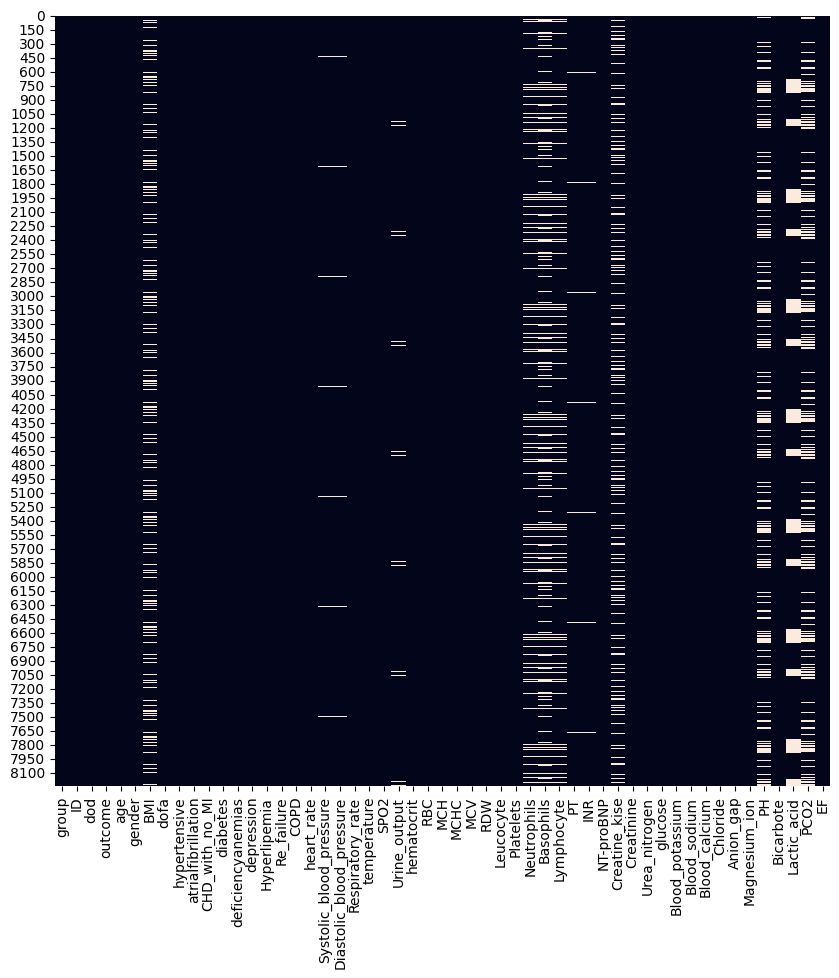

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data_as_csv_1.isnull(), cbar=False)

### Urmatorul output al celulei urmatoare ne prezinta rezultatele cu privire la completarea setului nostru de date

<Axes: >

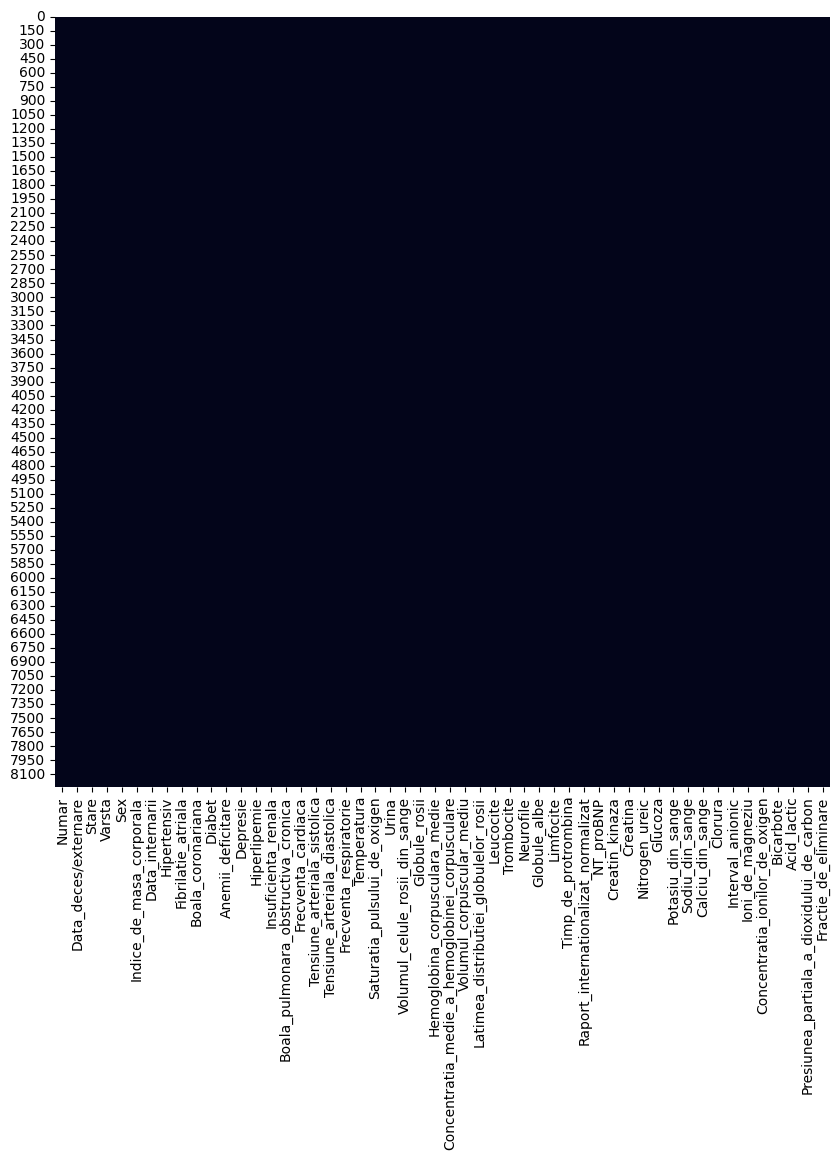

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data_as_csv.isnull(), cbar=False)

### Descriere sumativa a datelor

In [ ]:
data_as_csv.describe().style.background_gradient(cmap = 'copper')

,Numar,Data_deces/externare,Stare,Varsta,Sex,Indice_de_masa_corporala,Data_internarii,Hipertensiv,Fibrilatie_atriala,Boala_coronariana,Diabet,Anemii_deficitare,Depresie,Hiperlipemie,Insuficienta_renala,Boala_pulmonara_obstructiva_cronica,Frecventa_cardiaca,Tensiune_arteriala_sistolica,Tensiune_arteriala_diastolica,Frecventa_respiratorie,Temperatura,Saturatia_pulsului_de_oxigen,Urina,Volumul_celule_rosii_din_sange,Globule_rosii,Hemoglobina_corpusculara_medie,Concentratia_medie_a_hemoglobinei_corpusculare,Volumul_corpuscular_mediu,Latimea_distributiei_globulelor_rosii,Leucocite,Trombocite,Neurofile,Globule_albe,Limfocite,Timp_de_protrombina,Raport_internationalizat_normalizat,NT_proBNP,Creatin_kinaza,Creatina,Nitrogen_ureic,Glucoza,Potasiu_din_sange,Sodiu_din_sange,Calciu_din_sange,Clorura,Interval_anionic,Ioni_de_magneziu,Concentratia_ionilor_de_oxigen,Bicarbote,Acid_lactic,Presiunea_partiala_a_dioxidului_de_carbon,Fractie_de_eliminare
count,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232,8232
unique,8232,8232,2,68,2,934,8207,2,3,2,2,2,2,2,2,2,1095,1103,1078,1005,776,867,811,1055,1044,926,803,601,836,983,1085,636,74,541,784,426,1146,691,728,925,803,645,600,588,674,486,447,414,657,302,465,14
top,1,5/4/2012 19:28,alive,89,Male,30.188277651590337,11/29/2011 5:59,da,nu,nu,nu,nu,nu,nu,nu,nu,84.5758484075085,117.99503522048235,59.534496552256634,20.801511481503365,36.67728595220201,96.27290043504296,1899.2765118317266,35.73333333,3.12,30.1,33.1,92,15.5,11.5,222,80.11354430419135,0.40556943147167485,12.233024294061012,17.48105714916175,1.1,9834,246.77845607469405,1.1,23,148.79653094522882,4,140,8.5,104,14,2,7.378532073776282,26,1.8534255697974786,45.53538235441676,55
freq,1,1,7119,987,4326,1498,2,5908,4514,7525,4767,5439,7252,5103,5229,7609,84,105,105,84,126,84,245,28,35,49,63,112,63,35,28,1008,1813,1015,140,609,14,1155,91,56,119,119,147,119,126,203,259,2037,119,1596,2051,4137


#### Following the changes we made on the data set I chose, I noticed that certain columns are more significant than others for our analysis. These columns are either labeled in a certain way or contain numeric values. According to the purpose pursued by this analysis, we will consider the following columns to be significant, which I will group below according to their nature.
- Categorical columns
  - Stare
  - Sex
  - Diabet
  - Depresie
- Numerical columns
  - Indice_de_masa_corporala
  - Frecventa_cardiaca
  - Frecventa_respiratorie
  - Temperatura
  - Tensiunea_arteriala_sistolica / Tensiunea_arteriala_diastolica
  - Numarul de globule albe si rosii
  - Cantitatea de leucocite,trombocite,neurofile, limfocite
  - Cantitatea de Glucoza, Potasiu, Sodiu, Calciu, Clorura, Magneziu
  - etc.

## Next, we will present a series of graphs where you can see details about the variables mentioned above.